In [3]:
%matplotlib notebook

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
fruits = pd.read_table(r"C:\Users\aman.yadav\Downloads\fruit_data_with_colors.txt")

In [8]:
##Look at dataset
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [11]:
#Create a dict with mapping to all fruits
lookup_fruits_name = dict(zip(fruits["fruit_label"].unique(),fruits.fruit_name.unique()))
lookup_fruits_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [13]:
pd.__version__

'1.5.3'

In [17]:
## plot features vs features
from matplotlib import cm

X = fruits[["height","width","mass","color_score"]]
y = fruits["fruit_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

C:\Users\aman.yadav\AppData\Local\Temp\ipykernel_11864\750448477.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Accent")


<IPython.core.display.Javascript object>


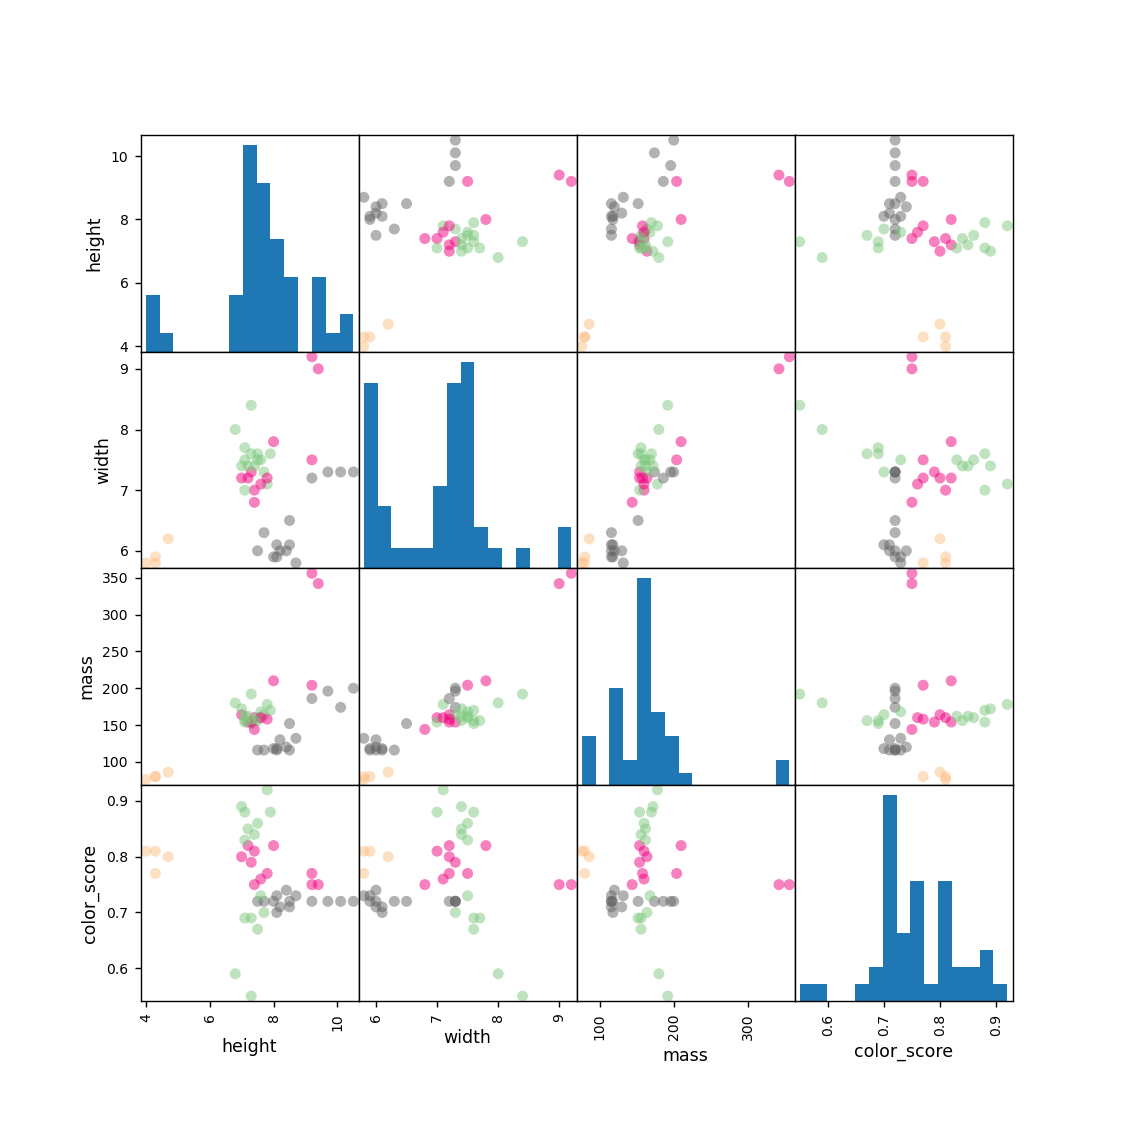

In [24]:
cmap = cm.get_cmap("Accent")
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker ="o", s=40, hist_kwds = {"bins":15}, figsize=(9,9), cmap = cmap)

<IPython.core.display.Javascript object>


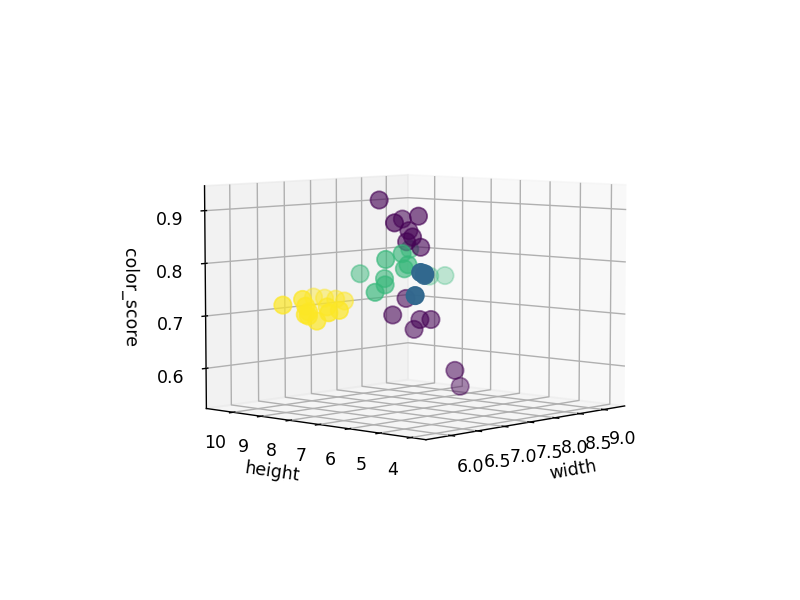

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X_train["width"], X_train["height"], X_train["color_score"], c = y_train, marker = "o", s = 100)
ax.set_xlabel("width")
ax.set_ylabel("height")
ax.set_zlabel("color_score")
plt.show()

In [32]:
## Create a train test split

X = fruits[["mass", "width", "height"]]
y = fruits["fruit_label"]

## with a 75% - 25% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [34]:
## Create a classifier object
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [35]:
## Train KNC object using training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
##Get the score of Classifier on untrained data

In [38]:
knn.score(X_test, y_test)

0.5333333333333333

In [43]:
# Testing out the classifier on a fruit with mass 20g, width 4.3cm, height 5.5 cm

fruit_prediction = knn.predict([[20,6.3,8.5]])
print(lookup_fruits_name[fruit_prediction[0]])

mandarin


C:\Users\aman.yadav\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [59]:
## Plot the decision boundries of KNN classifier
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    
    plt.show()

<IPython.core.display.Javascript object>


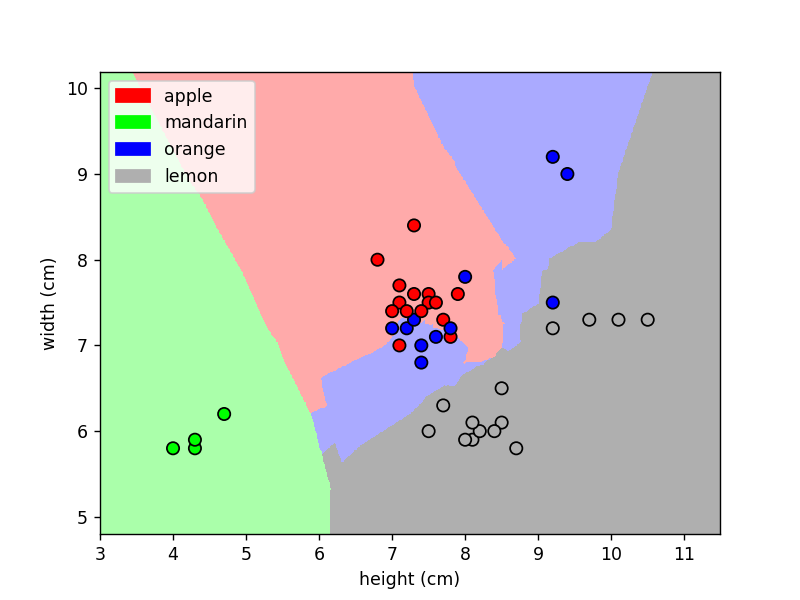

In [61]:
plot_fruit_knn(X_train, y_train, 5, "uniform")

<IPython.core.display.Javascript object>


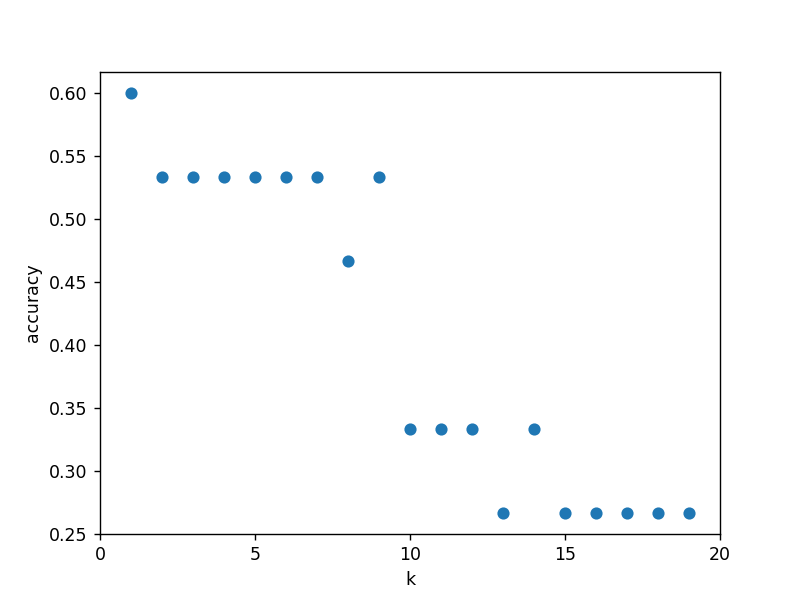

([<matplotlib.axis.XTick at 0x1faaa4afdd0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

In [65]:
#KNN score v/s value of K
scores = []

for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
    
plt.figure()
plt.xlabel("k")
plt.ylabel("accuracy")
plt.scatter(range(1,20), scores)
plt.xticks([0,5,10,15,20])

<IPython.core.display.Javascript object>


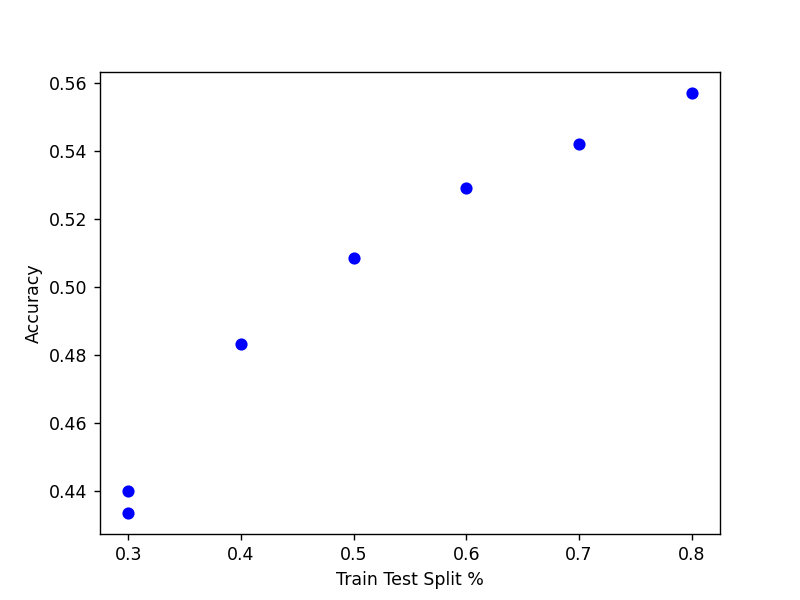

Text(0, 0.5, 'Accuracy')

In [71]:
#Senstivity of Scores v/s % of Test/Train split

t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.3]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:
    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train,y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), "bo")

plt.xlabel("Train Test Split %")
plt.ylabel("Accuracy")
        
        